In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

**Função Timer**

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print('\n Time taken: %i minutes and %s seconds.' % (tmin, round(tsec, 2)))

**Importar datasets**

In [3]:
train = pd.read_csv('train.csv', dtype={'id': np.int32, 'target': np.int8})
X = train.iloc[:,1:196]
Y = train.loc[:, train.columns == 'Y']
test = pd.read_csv('validation.csv', dtype={'id': np.int32})
X_test = test.iloc[:,1:196]
Y_test = test.loc[:, test.columns == 'Y']

all_features = [x for x in train.drop(['ID', 'Y'], axis=1).columns]

**Inserir parâmetros**  

In [4]:
folds = 5
step = 2

rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, n_jobs=6)

rfecv = RFECV(
              estimator=rfc,
              step=step,
              cv=StratifiedKFold(
                                 n_splits=folds,
                                 shuffle=False,
                                 random_state=1001).split(X,Y),
              scoring='roc_auc',
              n_jobs=1,
              verbose=2)

In [5]:
starttime = timer(None)
start_time = timer(None)
rfecv.fit(X, Y)
timer(start_time)

/home/nakayama/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 195 features.
Fitting estimator with 193 features.
Fitting estimator with 191 features.
Fitting estimator with 189 features.
Fitting estimator with 187 features.
Fitting estimator with 185 features.
Fitting estimator with 183 features.
Fitting estimator with 181 features.
Fitting estimator with 179 features.
Fitting estimator with 177 features.
Fitting estimator with 175 features.
Fitting estimator with 173 features.
Fitting estimator with 171 features.
Fitting estimator with 169 features.
Fitting estimator with 167 features.
Fitting estimator with 165 features.
Fitting estimator with 163 features.
Fitting estimator with 161 features.
Fitting estimator with 159 features.
Fitting estimator with 157 features.
Fitting estimator with 155 features.
Fitting estimator with 153 features.
Fitting estimator with 151 features.
Fitting estimator with 149 features.
Fitting estimator with 147 features.
Fitting estimator with 145 features.
Fitting estimator with 143 features.
F

Fitting estimator with 133 features.
Fitting estimator with 131 features.
Fitting estimator with 129 features.
Fitting estimator with 127 features.
Fitting estimator with 125 features.
Fitting estimator with 123 features.
Fitting estimator with 121 features.
Fitting estimator with 119 features.
Fitting estimator with 117 features.
Fitting estimator with 115 features.
Fitting estimator with 113 features.
Fitting estimator with 111 features.
Fitting estimator with 109 features.
Fitting estimator with 107 features.
Fitting estimator with 105 features.
Fitting estimator with 103 features.
Fitting estimator with 101 features.
Fitting estimator with 99 features.
Fitting estimator with 97 features.
Fitting estimator with 95 features.
Fitting estimator with 93 features.
Fitting estimator with 91 features.
Fitting estimator with 89 features.
Fitting estimator with 87 features.
Fitting estimator with 85 features.
Fitting estimator with 83 features.
Fitting estimator with 81 features.
Fitting est

Fitting estimator with 71 features.
Fitting estimator with 69 features.
Fitting estimator with 67 features.
Fitting estimator with 65 features.
Fitting estimator with 63 features.
Fitting estimator with 61 features.
Fitting estimator with 59 features.
Fitting estimator with 57 features.
Fitting estimator with 55 features.
Fitting estimator with 53 features.
Fitting estimator with 51 features.
Fitting estimator with 49 features.
Fitting estimator with 47 features.
Fitting estimator with 45 features.
Fitting estimator with 43 features.
Fitting estimator with 41 features.
Fitting estimator with 39 features.
Fitting estimator with 37 features.
Fitting estimator with 35 features.
Fitting estimator with 33 features.
Fitting estimator with 31 features.
Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 fe

In [6]:
print('\n Optimal number of features: %d' % rfecv.n_features_)
sel_features = [f for f, s in zip(all_features, rfecv.support_) if s]
print('\n The selected features are {}:'.format(sel_features))


 Optimal number of features: 29

 The selected features are ['v8', 'v9', 'v10', 'v17', 'v276', 'v277', 'v280', 'v281', 'v584', 'v585', 'v586', 'v587', 'v588', 'v589', 'v600', 'v604', 'v608', 'v612', 'v645', 'v646', 'v658', 'v686', 'v687', 'v689', 'v690', 'v691', 'v694', 'v72', 'v78']:


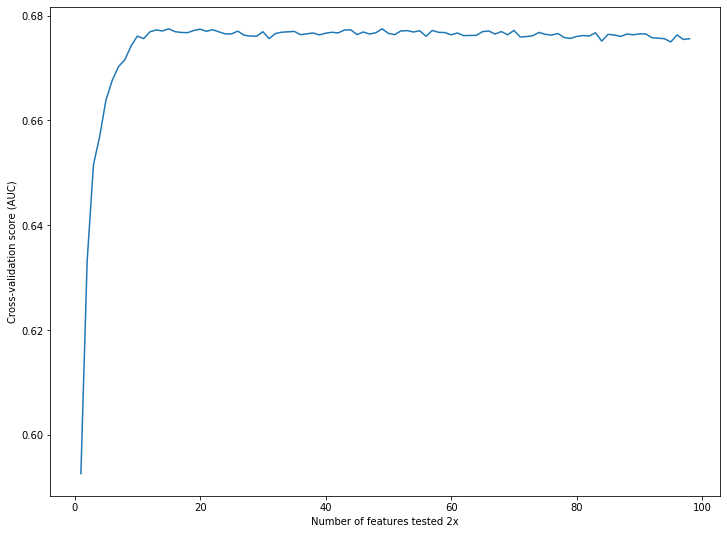

In [7]:
plt.figure(figsize=(12, 9))
plt.xlabel('Number of features tested 2x')
plt.ylabel('Cross-validation score (AUC)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig('Train_x_validation.png', dpi=150)
plt.show()

In [8]:
ranking = pd.DataFrame({'Features': all_features})
ranking['Rank'] = np.asarray(rfecv.ranking_)
ranking.sort_values('Rank', inplace=True)
ranking.to_csv('rfecv_random_forest_treino_x_validacao.csv', index=False)

In [9]:
score = round((np.max(rfecv.grid_scores_) * 2 - 1), 5)
test['target'] = rfecv.predict_proba(X_test)[:,1]
test = test[['ID', 'Y']]
now = datetime.now()
sub_file = 'submission_5fold-RFECV-RandomForest-01_' + str(score) + '_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
print("\n Writing submission file: %s" % sub_file)
test.to_csv(sub_file, index=False)
timer(starttime)


 Writing submission file: submission_5fold-RFECV-RandomForest-01_0.35498_2019-11-14-20-05.csv

 Time taken: 23 minutes and 18.02 seconds.
